In [127]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from yahoo_historical import Fetcher


In [128]:
rsi_threshold = 75

In [129]:
ticker = 'XQQ.TO'
start = [2019,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200


In [130]:
exp1 = df.Close.ewm(span=12, adjust=False).mean()
exp2 = df.Close.ewm(span=26, adjust=False).mean()

#df['macd'] = exp1-exp2
#df['signal'] = macd.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
signal = macd.ewm(span=9, adjust=False).mean()
df['macd'] = macd-signal

print(signal.shape)
print(macd.shape)

(384,)
(384,)


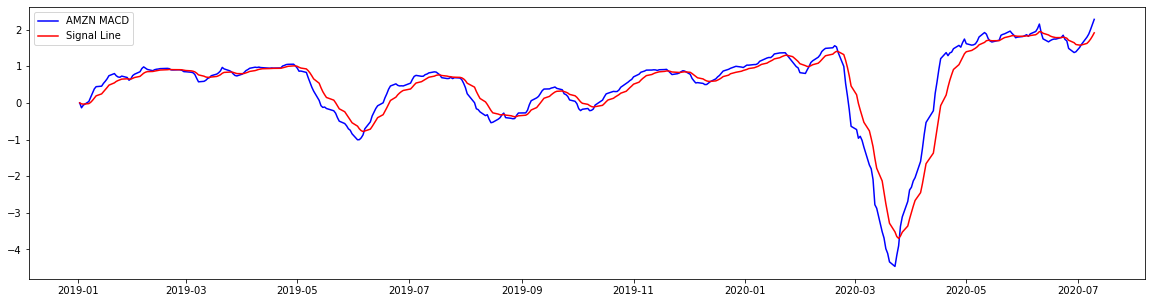

In [131]:
plt.figure(figsize=(20,5))
plt.plot(df.Date, macd, label='AMZN MACD', color = 'b')
plt.plot(df.Date, signal, label='Signal Line', color='r')
plt.legend(loc='upper left')
plt.show()


In [132]:
pd.set_option('max.rows',None)
df[df.Date>=pd.to_datetime('2020-1-1')].head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,macd
251,2020-01-02,70.290001,70.720001,70.150002,70.720001,70.602570,20800,0.117710
252,2020-01-03,69.900002,70.519997,69.900002,70.199997,70.083435,37800,0.092932
253,2020-01-06,69.529999,70.570000,69.529999,70.570000,70.452820,28600,0.087594
254,2020-01-07,70.529999,70.750000,70.430000,70.570000,70.452820,9500,0.070910
255,2020-01-08,70.480003,71.419998,70.480003,71.059998,70.942001,23100,0.079096
256,2020-01-09,71.730003,71.830002,71.349998,71.690002,71.570961,29700,0.111197
257,2020-01-10,72.050003,72.050003,71.500000,71.550003,71.431198,15200,0.107210
258,2020-01-13,71.860001,72.360001,71.760002,72.330002,72.209900,22900,0.139282
259,2020-01-14,72.330002,72.379997,72.000000,72.029999,71.910393,20300,0.123032
260,2020-01-15,72.180000,72.419998,71.930000,72.019997,71.900414,22600,0.095574


In [133]:
df['macd'] = macd-signal
df['buy'] = df.macd>0
df.buy = df.buy.astype(int)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1
5,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749107,214600,0.209680,1
6,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887714,215800,0.251201,1
7,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689709,90400,0.250104,1
8,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323395,84800,0.210932,1
9,2019-01-15,52.810001,53.799999,52.810001,53.730000,53.194626,111100,0.229241,1


In [134]:
state=0
df_sig = []
import pdb
for i in range(df.shape[0]):
    if((df.buy[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)       

In [135]:
len(df_sig)

33

In [136]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [137]:
df_sig['chg_pct'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
#df_sig

In [138]:
df_sig1 = df_sig[df_sig.buy==0]
#df_sig1

In [139]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

66.67965900233827

In [140]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct/100)-1)

33.53601240977313

In [141]:
df_sig1[df_sig1.chg_pct>0].chg_pct.sum()

39.362218188150806

In [142]:
df_sig1.chg_pct.sum()

30.490214147837605

In [143]:
chg_pct = 100*(df.Close-df.Close.shift(1))/df.Close.shift(1)
chg = df.Close-df.Close.shift(1)
print(df.shape)
print(chg.shape)

(384, 9)
(384,)


<H3> MACD value changes

In [144]:
df['macd_dir'] = df.macd>0
df.macd_dir = df.macd_dir.astype(int)
df['macd_chg'] = df.macd-df.macd.shift(1)
df['macd_chg_abs'] = abs(df['macd_chg'])
df['macd_chg_pct'] = (df.macd-df.macd.shift(1))/df.macd.shift(1)
df['macd_chg_dir'] = df.macd_chg_pct>0
df.macd_chg_dir = df.macd_chg_dir.astype(int)
df['macd_chg_pct_abs'] = abs(df.macd_chg_pct)
df=df[['Date','Close','macd','macd_dir','macd_chg','macd_chg_abs','macd_chg_pct','macd_chg_pct_abs','macd_chg_dir']]
df.head(10)

,Date,Close,macd,macd_dir,macd_chg,macd_chg_abs,macd_chg_pct,macd_chg_pct_abs,macd_chg_dir
0,2019-01-02,51.320000,0.000000,0,NaN,NaN,NaN,NaN,0
1,2019-01-03,49.650002,-0.106575,0,-0.106575,0.106575,-inf,inf,0
2,2019-01-04,51.840000,-0.027784,0,0.078791,0.078791,-0.739298,0.739298,0
3,2019-01-07,52.360001,0.056548,1,0.084333,0.084333,-3.035248,3.035248,0
4,2019-01-08,52.869999,0.139166,1,0.082618,0.082618,1.461018,1.461018,1
5,2019-01-09,53.279999,0.209680,1,0.070513,0.070513,0.506685,0.506685,1
6,2019-01-10,53.419998,0.251201,1,0.041521,0.041521,0.198023,0.198023,1
7,2019-01-11,53.220001,0.250104,1,-0.001097,0.001097,-0.004368,0.004368,0
8,2019-01-14,52.849998,0.210932,1,-0.039172,0.039172,-0.156621,0.156621,0
9,2019-01-15,53.730000,0.229241,1,0.018309,0.018309,0.086801,0.086801,1


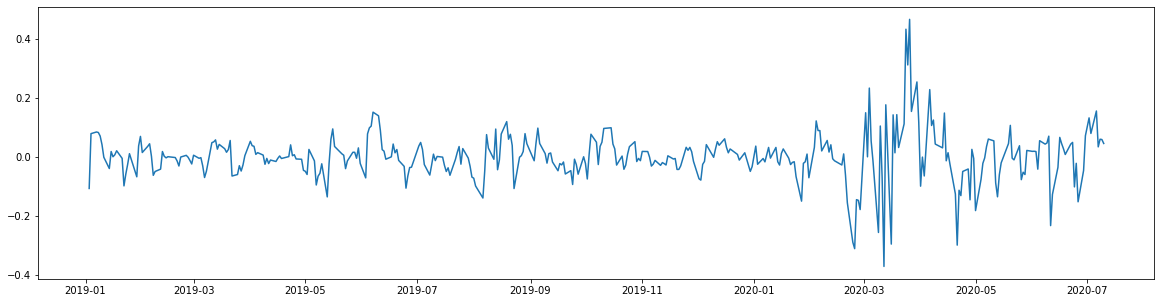

In [145]:
plt.figure(figsize=(20,5))
plt.plot(df.Date,df.macd_chg)

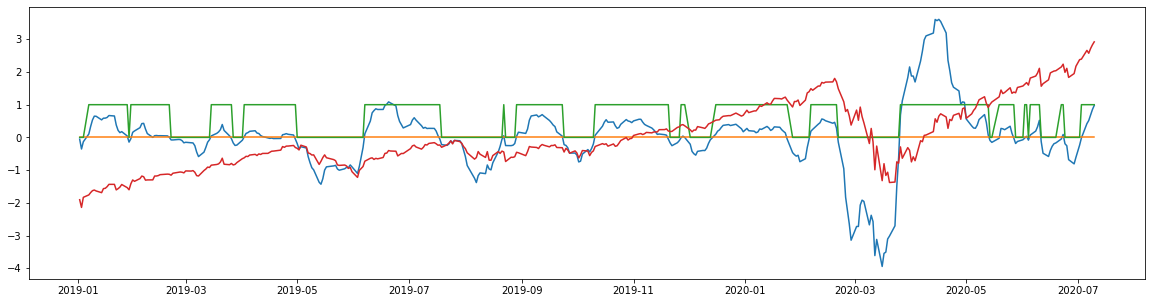

In [146]:
plt.figure(figsize=(20,5))
horizontal = np.zeros(df.shape[0])
macd_norm = (df.macd-df.macd.mean())/df.macd.std()
price_norm = (df.Close-df.Close.mean())/(df.Close.std())
plt.plot(df.Date, macd_norm)
plt.plot(df.Date, horizontal)
plt.plot(df.Date, df.macd_dir)
plt.plot(df.Date, price_norm)

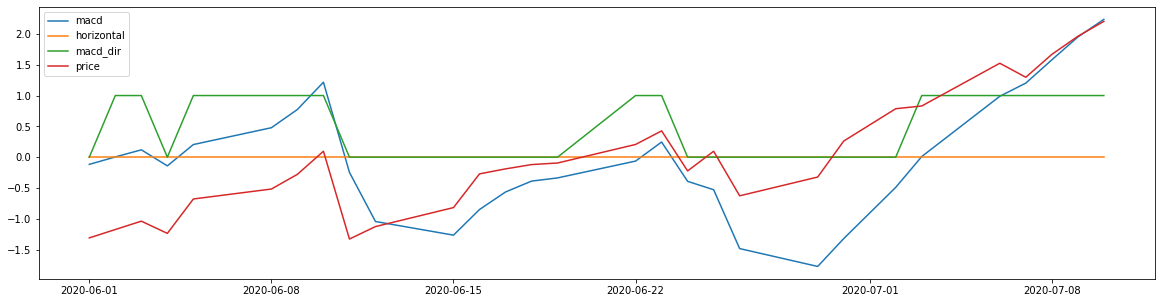

In [245]:
tmp = df[df.Date>=pd.to_datetime('2020-6-1')]
plt.figure(figsize=(20,5))
horizontal = np.zeros(tmp.shape[0])
macd_norm = (tmp.macd-tmp.macd.mean())/tmp.macd.std()
price_norm = (tmp.Close-tmp.Close.mean())/(tmp.Close.std())
plt.plot(tmp.Date, macd_norm)
plt.plot(tmp.Date, horizontal)
plt.plot(tmp.Date, tmp.macd_dir)
plt.plot(tmp.Date, price_norm)
plt.legend(['macd','horizontal','macd_dir','price'])

In [246]:
tmp

,Date,Close,macd,macd_dir,macd_chg,macd_chg_abs,macd_chg_pct,macd_chg_pct_abs,macd_chg_dir,bull_period,bear_period
355,2020-06-01,75.970001,-0.005757,0,0.018872,0.018872,-0.766257,0.766257,0,NaN,3.0
356,2020-06-02,76.339996,0.013403,1,0.019160,0.019160,-3.328252,3.328252,0,NaN,NaN
357,2020-06-03,76.709999,0.031709,1,0.018306,0.018306,1.365801,1.365801,1,2.0,NaN
358,2020-06-04,76.169998,-0.009627,0,-0.041335,0.041335,-1.303589,1.303589,0,NaN,NaN
359,2020-06-05,77.690002,0.045309,1,0.054936,0.054936,-5.706735,5.706735,0,NaN,NaN
360,2020-06-08,78.129997,0.088680,1,0.043370,0.043370,0.957202,0.957202,1,NaN,NaN
361,2020-06-09,78.779999,0.135727,1,0.047048,0.047048,0.530534,0.530534,1,NaN,NaN
362,2020-06-10,79.800003,0.205917,1,0.070190,0.070190,0.517136,0.517136,1,4.0,NaN
363,2020-06-11,75.919998,-0.026245,0,-0.232161,0.232161,-1.127453,1.127453,0,NaN,NaN
364,2020-06-12,76.470001,-0.152971,0,-0.126726,0.126726,4.828661,4.828661,1,NaN,NaN


In [147]:
#plt.figure(figsize=(20,5))
#plt.plot(df.Date,df.macd)
#plt.plot(df.Date, horizontal)

In [167]:
df.tail(20)

,Date,Close,macd,macd_dir,macd_chg,macd_chg_abs,macd_chg_pct,macd_chg_pct_abs,macd_chg_dir,bull_period,bear_period
364,2020-06-12,76.470001,-0.152971,0,-0.126726,0.126726,4.828661,4.828661,1,NaN,NaN
365,2020-06-15,77.309998,-0.188114,0,-0.035143,0.035143,0.229737,0.229737,1,NaN,NaN
366,2020-06-16,78.800003,-0.122102,0,0.066013,0.066013,-0.350917,0.350917,0,NaN,NaN
367,2020-06-17,79.019997,-0.076918,0,0.045184,0.045184,-0.370049,0.370049,0,NaN,NaN
368,2020-06-18,79.209999,-0.048897,0,0.028021,0.028021,-0.364298,0.364298,0,NaN,NaN
369,2020-06-19,79.279999,-0.040649,0,0.008248,0.008248,-0.168687,0.168687,0,NaN,7.0
370,2020-06-22,80.099998,0.002730,1,0.043378,0.043378,-1.067158,1.067158,0,NaN,NaN
371,2020-06-23,80.699997,0.051807,1,0.049077,0.049077,17.977760,17.977760,1,2.0,NaN
372,2020-06-24,78.930000,-0.049482,0,-0.101289,0.101289,-1.955114,1.955114,0,NaN,NaN
373,2020-06-25,79.800003,-0.071117,0,-0.021635,0.021635,0.437226,0.437226,1,NaN,NaN


In [208]:
import pdb
bear=0
bull=0
df['bull_period'] = np.empty(df.shape[0])
df.bull_period = np.nan
df['bear_period'] = np.empty(df.shape[0])
df.bear_period = np.nan
dates_bull=[]
dates_bear=[]
tmp=[]
tmp2=[]
for i in range(1,df.shape[0]):
    if((df.macd[i]>0) & (df.macd[i-1]>0)):
        if(bull==0):
            tmp.append(df.Date[i-1])
        bull+=1
    if((bull>0) & (df.macd[i]<0)):
        df.bull_period[i-1] = bull+1
        tmp.append(df.Date[i-1])
        dates_bull.append(tmp)
        bull=0
        tmp=[]
    if((i==df.shape[0]-1) & (bull>0)):
        tmp.append(df.Date[i])
        dates_bull.append(tmp)
        df.bull_period[i-1] = bull+1
        
        
    if((df.macd[i]<0) & (df.macd[i-1]<0)):
        if(bear==0):
            tmp2.append(df.Date[i-1])
        bear+=1
    if((bear>0) & (df.macd[i]>0)):
        df.bear_period[i-1] = bear+1
        tmp2.append(df.Date[i-1])
        dates_bear.append(tmp2)
        bear=0  
        tmp2=[]
    if((i==df.shape[0]-1) & (bear>0)):
        tmp2.append(df.Date[i])
        dates_bear.append(tmp2)
        df.bear_period[i-1] = bear+1
              
    

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [209]:
bull_periods

18     16.0
34     15.0
58      8.0
82     20.0
137    29.0
182    17.0
223    28.0
230     3.0
267    27.0
285    10.0
343    34.0
352     7.0
357     2.0
362     4.0
371     2.0
Name: bull_period, dtype: float64

In [210]:
dates_bull

[[Timestamp('2019-01-07 00:00:00'), Timestamp('2019-01-28 00:00:00')],
 [Timestamp('2019-01-30 00:00:00'), Timestamp('2019-02-20 00:00:00')],
 [Timestamp('2019-03-15 00:00:00'), Timestamp('2019-03-26 00:00:00')],
 [Timestamp('2019-04-02 00:00:00'), Timestamp('2019-04-30 00:00:00')],
 [Timestamp('2019-06-07 00:00:00'), Timestamp('2019-07-18 00:00:00')],
 [Timestamp('2019-08-29 00:00:00'), Timestamp('2019-09-23 00:00:00')],
 [Timestamp('2019-10-11 00:00:00'), Timestamp('2019-11-20 00:00:00')],
 [Timestamp('2019-11-27 00:00:00'), Timestamp('2019-11-29 00:00:00')],
 [Timestamp('2019-12-16 00:00:00'), Timestamp('2020-01-24 00:00:00')],
 [Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-20 00:00:00')],
 [Timestamp('2020-03-26 00:00:00'), Timestamp('2020-05-13 00:00:00')],
 [Timestamp('2020-05-19 00:00:00'), Timestamp('2020-05-27 00:00:00')],
 [Timestamp('2020-06-02 00:00:00'), Timestamp('2020-06-03 00:00:00')],
 [Timestamp('2020-06-05 00:00:00'), Timestamp('2020-06-10 00:00:00')],
 [Time

In [211]:
bull_periods = df.bull_period[df.bull_period.isnull()==False]
len(bull_periods)
bull_periods.reset_index(drop=True)

0     16.0
1     15.0
2      8.0
3     20.0
4     29.0
5     17.0
6     28.0
7      3.0
8     27.0
9     10.0
10    34.0
11     7.0
12     2.0
13     4.0
14     2.0
15     6.0
Name: bull_period, dtype: float64

In [212]:
bear_periods = df.bear_period[df.bear_period.isnull()==False]
len(bear_periods)
bear_periods.reset_index(drop=True)

0      2.0
1     16.0
2      4.0
3     26.0
4     23.0
5      4.0
6     13.0
7      4.0
8     10.0
9      8.0
10    24.0
11     2.0
12     3.0
13     7.0
14     6.0
Name: bear_period, dtype: float64

In [213]:
print(len(dates_bull))

16


In [214]:
#df[(df.Date>=pd.to_datetime('2020-6-22')) & (df.Date<=pd.to_datetime('2020-6-24'))]

In [215]:
dates_bull = pd.DataFrame(dates_bull, columns=['Start','End'])
dates_bull = dates_bull.assign(len = bull_periods.values)

In [216]:
dates_bull['macd_max'] = np.zeros(dates_bull.shape[0])
dates_bull['chg_max'] =  np.zeros(dates_bull.shape[0])
dates_bull['chg_pct_max'] = np.zeros(dates_bull.shape[0])
dates_bull['gain_loss'] = np.zeros(dates_bull.shape[0])
for i in range(dates_bull.shape[0]):
    subset = df[(df.Date>=dates_bull.Start[i]) & (df.Date<=dates_bull.End[i])]
    dates_bull.macd_max[i] = subset.macd.max()
    dates_bull.chg_max[i] = subset.macd_chg.max()
    dates_bull.chg_pct_max[i] = subset.macd_chg_pct.max()
    dates_bull.gain_loss[i] = 100*(float(subset.Close.tail(1))-float(subset.Close.head(1)))/float(subset.Close.head(1))

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '

In [217]:
dates_bull

,Start,End,len,macd_max,chg_max,chg_pct_max,gain_loss
0,2019-01-07,2019-01-28,16.0,0.257985,0.084333,1.461018,3.017567
1,2019-01-30,2019-02-20,15.0,0.172852,0.069412,12.127974,3.760498
2,2019-03-15,2019-03-26,8.0,0.160415,0.055559,0.767327,0.629143
3,2019-04-02,2019-04-30,20.0,0.092352,0.040782,4.925402,3.692051
4,2019-06-07,2019-07-18,29.0,0.406982,0.151390,2.360878,5.899114
5,2019-08-29,2019-09-23,17.0,0.268050,0.097414,1.419155,1.607146
6,2019-10-11,2019-11-20,28.0,0.217718,0.098588,2.275101,5.345211
7,2019-11-27,2019-11-29,3.0,0.034033,0.032180,1.049389,-0.251823
8,2019-12-16,2020-01-24,27.0,0.162995,0.061202,0.587778,6.359393
9,2020-02-06,2020-02-20,10.0,0.220674,0.089084,0.517556,1.989654


In [221]:
100*(np.prod(1+dates_bull.gain_loss/100)-1)  

71.4073948418933

In [222]:
dates_bull.gain_loss.sum()

55.60590864526405

In [224]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

66.67965900233827

In [227]:
dates_bull_2020 = dates_bull[dates_bull.Start>=pd.to_datetime('2020-1-1')]

In [228]:
df_2020 = df[df.Date>=pd.to_datetime('2020-1-1')]

In [229]:
100*(np.prod(1+dates_bull_2020.gain_loss/100)-1)  

27.792328110001296

In [230]:
100*(float(df_2020.Close.tail(1))-float(df_2020.Close.head(1)))/float(df_2020.Close.head(1))

20.955882056619327

In [231]:
dates_bull_2019 = dates_bull[(dates_bull.Start>=pd.to_datetime('2019-1-1')) & (dates_bull.End<= pd.to_datetime('2019-12-31'))]
dates_bull_2019

,Start,End,len,macd_max,chg_max,chg_pct_max,gain_loss
0,2019-01-07,2019-01-28,16.0,0.257985,0.084333,1.461018,3.017567
1,2019-01-30,2019-02-20,15.0,0.172852,0.069412,12.127974,3.760498
2,2019-03-15,2019-03-26,8.0,0.160415,0.055559,0.767327,0.629143
3,2019-04-02,2019-04-30,20.0,0.092352,0.040782,4.925402,3.692051
4,2019-06-07,2019-07-18,29.0,0.406982,0.151390,2.360878,5.899114
5,2019-08-29,2019-09-23,17.0,0.268050,0.097414,1.419155,1.607146
6,2019-10-11,2019-11-20,28.0,0.217718,0.098588,2.275101,5.345211
7,2019-11-27,2019-11-29,3.0,0.034033,0.032180,1.049389,-0.251823


In [234]:
df_2019 = df[df.Date<pd.to_datetime('2020-1-1')]

In [235]:
100*(np.prod(1+dates_bull_2019.gain_loss/100)-1)  

26.109824209485378

In [238]:
dates_bull_2019.gain_loss.sum()

23.698907288745914

In [236]:
100*(float(df_2019.Close.tail(1))-float(df_2019.Close.head(1)))/float(df_2019.Close.head(1))

35.67809236165238

In [102]:
dates_bear = pd.DataFrame(dates_bear, columns=['Start','End'])
dates_bear.assign(len = bear_periods.values)

,Start,End,len
0,2019-01-03,2019-01-04,2.0
1,2019-02-21,2019-03-14,16.0
2,2019-03-27,2019-04-01,4.0
3,2019-05-01,2019-06-06,26.0
4,2019-07-19,2019-08-21,23.0
5,2019-08-23,2019-08-28,4.0
6,2019-09-24,2019-10-10,13.0
7,2019-11-21,2019-11-26,4.0
8,2019-12-02,2019-12-13,10.0
9,2020-01-27,2020-02-05,8.0


In [103]:
dates_bear['macd_min'] = np.zeros(dates_bear.shape[0])
dates_bear['chg_max'] =  np.zeros(dates_bear.shape[0])
dates_bear['chg_pct_max'] = np.zeros(dates_bear.shape[0])
for i in range(dates_bear.shape[0]):
    subset = df[(df.Date>=dates_bear.Start[i]) & (df.Date<=dates_bear.End[i])]
    dates_bear.macd_min[i] = subset.macd.min()
    dates_bear.chg_max[i] = subset.macd_chg_abs.max()
    dates_bear.chg_pct_max[i] = subset.macd_chg_pct_abs.max()

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
dates_bear

,Start,End,macd_min,chg_max,chg_pct_max
0,2019-01-03,2019-01-04,-0.106575,0.106575,inf
1,2019-02-21,2019-03-14,-0.189121,0.069583,3.301820
2,2019-03-27,2019-04-01,-0.067935,0.052844,7.040912
3,2019-05-01,2019-06-06,-0.490580,0.135123,84.984237
4,2019-07-19,2019-08-21,-0.472460,0.138852,19.600080
5,2019-08-23,2019-08-28,-0.070067,0.106851,2.830931
6,2019-09-24,2019-10-10,-0.247616,0.093176,2.778944
7,2019-11-21,2019-11-26,-0.070520,0.042223,21.046104
8,2019-12-02,2019-12-13,-0.173545,0.078398,3.904758
9,2020-01-27,2020-02-05,-0.245161,0.149459,48.196571


In [105]:
dates_bear = dates_bear[dates_bear.macd_min<=-0.45]
dates_bear

,Start,End,macd_min,chg_max,chg_pct_max
3,2019-05-01,2019-06-06,-0.490580,0.135123,84.984237
4,2019-07-19,2019-08-21,-0.472460,0.138852,19.600080
10,2020-02-21,2020-03-25,-1.386685,0.431725,8.786915


In [106]:
df = df[['Date','Close','macd']]

In [116]:
state=0
df_sig = []
buy_sell=np.empty(df.shape[0])
buy_sell.fill(np.nan)

#first buy date = first bull date
first = dates_bull[dates_bull.len>=10].head(1)
first.Start.values


,Date,Close,macd
3,2019-01-07,52.360001,0.056548


In [117]:
state=0
df_sig = []
buy_sell=np.empty(df.shape[0])
buy_sell.fill(np.nan)

#first buy date = first bull date
first = dates_bull[dates_bull.len>=10].head(1)
df_sig.append(df[df.Date.isin(first.Start)])
buy_sell[0] = 1

#last date
if(df.macd.iloc[-1]>0):
    df_sig.append(df.iloc[-1,:].to_frame().T)
    buy_sell[-1] = 0  

df_sig    

[        Date      Close      macd
 3 2019-01-07  52.360001  0.056548,           Date  Close      macd
 382 2020-07-09  84.88  0.322397]

In [118]:
for i in range(df.shape[0]):

    #sell
    if((df.macd[i] <= -0.45) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
        buy_sell[i]=0
    #buy
    if((df.macd[i]>0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)
        buy_sell[i]=1        
        
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.drop_duplicates().reset_index(drop=True)
df_sig = df_sig.sort_values('Date')
df_sig['chg_pct'] = 100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

buy_sell = buy_sell[~np.isnan(buy_sell)]
print(df_sig.shape)
print(buy_sell.shape) 
df_sig['buy'] = buy_sell
df_sig

(8, 4)
(8,)


,Date,Close,macd,chg_pct,buy
0,2019-01-07,52.36,0.0565482,NaN,1.0
2,2019-05-13,58.97,-0.468961,12.6241,0.0
3,2019-06-07,59.67,0.0588734,1.18704,1.0
4,2019-08-07,60.46,-0.47246,1.32395,0.0
5,2019-08-22,61.67,0.0377441,2.00132,1.0
6,2020-02-25,70.45,-0.631556,14.2371,0.0
7,2020-03-26,62.77,0.26378,-10.9013,1.0
1,2020-07-09,84.88,0.322397,35.2238,0.0


In [119]:
df_sig1 = df_sig[df_sig.buy==0]
df_sig1

,Date,Close,macd,chg_pct,buy
2,2019-05-13,58.97,-0.468961,12.6241,0.0
4,2019-08-07,60.46,-0.47246,1.32395,0.0
6,2020-02-25,70.45,-0.631556,14.2371,0.0
1,2020-07-09,84.88,0.322397,35.2238,0.0


In [120]:
gain_loss = 100*(np.prod(1+df_sig1.chg_pct/100)-1)   
gain_loss 

76.28033730509254

In [124]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

65.39360288386594